In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [97]:
learning_rate = 0.0005
epsilon = 1e-5
reg = 0.001

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# x_norm = tf.

W1 = tf.Variable(tf.truncated_normal([784, 784]))
b1 = tf.Variable(tf.zeros([784]))

W2 = tf.Variable(tf.truncated_normal([784, 10]))
b2 = tf.Variable(tf.zeros([10]))

l1_out = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# pred = tf.nn.softmax(l1_out)

pred = tf.nn.softmax(tf.matmul(l1_out, W2) + b2)

loss_noreg = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+epsilon), reduction_indices=1))

loss = loss_noreg + reg*(tf.reduce_sum(tf.square(W1)) + tf.reduce_sum(tf.square(W2)))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [98]:
num_steps = 7000

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
# print "initial accuracy: ", acc

loss_history = []
validation_accuracy_history = []
training_accuracy_history = []

for step in range(num_steps):

    batch_xs, batch_ys = mnist.train.next_batch(100)

    prev1 =  sess.run([W1, b1])
    # prev2 = sess.run([W2, b2])

    out, _ = sess.run([pred, train], { x: batch_xs, y:batch_ys })

    # print "out: ", out[0]
    run_loss = sess.run([loss], { x: batch_xs, y:batch_ys })
    
    runv_acc = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    runt_acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})
    
    if step%500 == 0:
        print "Iteration(",step,"/",num_steps,") loss: ", run_loss," train_accuracy: ",runt_acc," validation_accuracy: ",runv_acc
    
    loss_history.append(run_loss)
    validation_accuracy_history.append(runv_acc)
    training_accuracy_history.append(runt_acc)

    now1 = sess.run([W1, b1])
    # now2 = sess.run([W2, b2])

    # print now1[0] - prev1[0]
    # print now1[1] - prev1[1]
    # print now2[0] - prev2[0]

print "complete"

Iteration( 0 / 7000 ) loss:  [491.10904]  train_accuracy:  0.08  validation_accuracy:  0.0826
Iteration( 500 / 7000 ) loss:  [320.98434]  train_accuracy:  0.49  validation_accuracy:  0.4922
Iteration( 1000 / 7000 ) loss:  [211.19972]  train_accuracy:  0.46  validation_accuracy:  0.5252
Iteration( 1500 / 7000 ) loss:  [134.99123]  train_accuracy:  0.61  validation_accuracy:  0.6124
Iteration( 2000 / 7000 ) loss:  [84.886894]  train_accuracy:  0.7  validation_accuracy:  0.6258
Iteration( 2500 / 7000 ) loss:  [50.35207]  train_accuracy:  0.87  validation_accuracy:  0.8322
Iteration( 3000 / 7000 ) loss:  [30.107868]  train_accuracy:  0.89  validation_accuracy:  0.8438
Iteration( 3500 / 7000 ) loss:  [16.632805]  train_accuracy:  0.97  validation_accuracy:  0.9426
Iteration( 4000 / 7000 ) loss:  [9.5332346]  train_accuracy:  0.9  validation_accuracy:  0.9464
Iteration( 4500 / 7000 ) loss:  [5.3935275]  train_accuracy:  0.92  validation_accuracy:  0.9388
Iteration( 5000 / 7000 ) loss:  [3.23

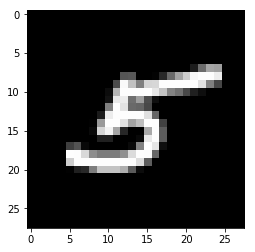

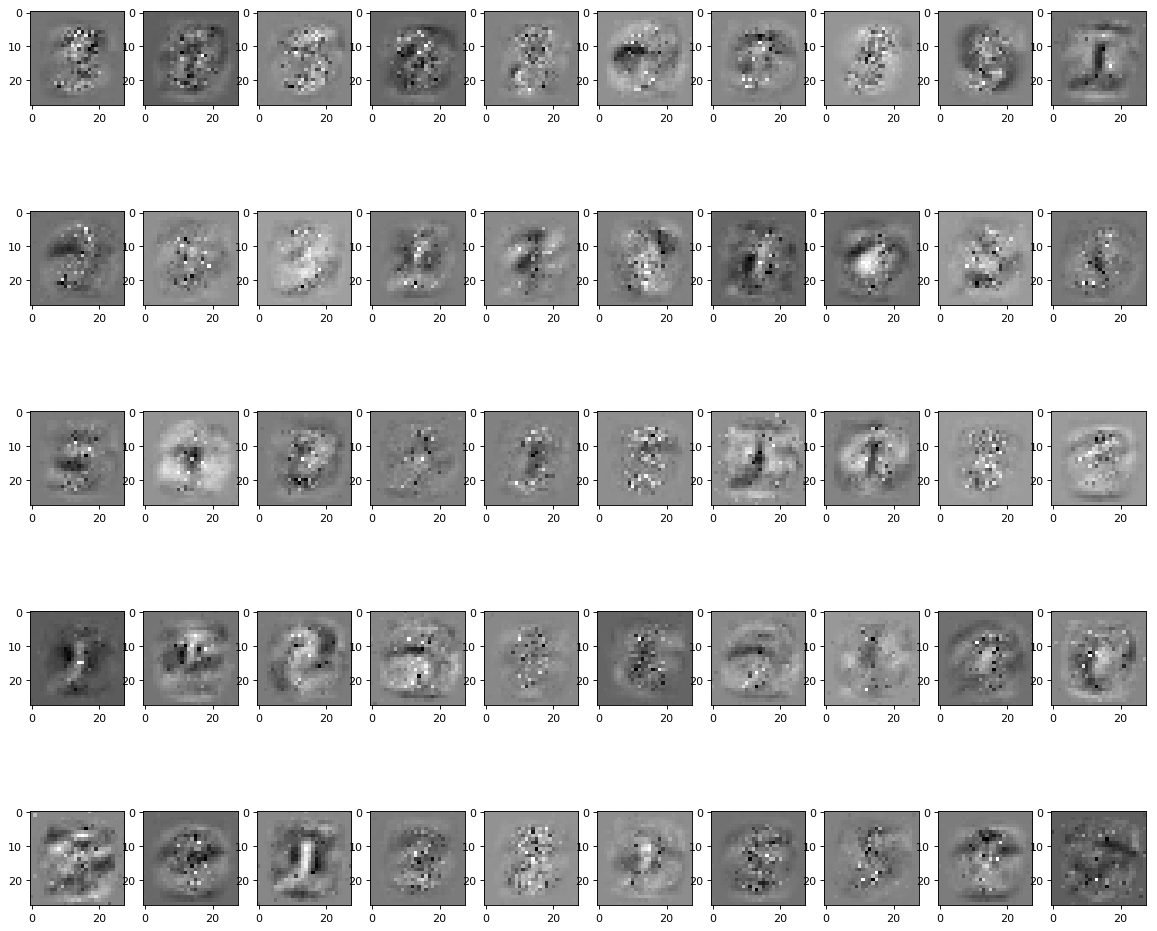

In [106]:
W2_final = sess.run([W2])
W1_final = sess.run([W1])

W1_final = np.reshape(W1_final, [28, 28, 784])

indices = range(50,100)

plt.imshow(mnist.train.images[0].reshape([28, 28]), cmap="gray")
plt.show()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(indices)):
    plt.subplot(5, 10, i+1)
    plt.imshow(W1_final[:, :, indices[i]], cmap="gray")

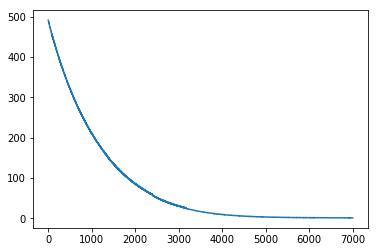

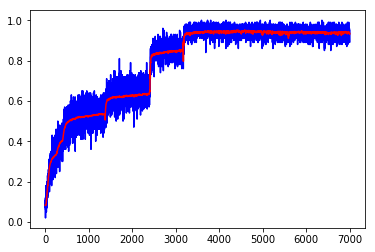

In [107]:
plt.plot(range(num_steps), loss_history)

plt.show()

plt.plot(range(num_steps), training_accuracy_history, color='b')
plt.plot(range(num_steps), validation_accuracy_history, color='r')

In [108]:
acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print "accuracy: ",acc

accuracy:  0.9273
